If you are not using GitHub [click here to open the notebook using nbviewer](http://nbviewer.jupyter.org/github/biocore/emperor/blob/new-api/examples/keyboard.ipynb).

# Emperor's Python API

**This notebook demonstrate Emperor's new Python API, which can and will change as we continue to exercise this interface, for more information, have a look at the [pull request here](https://github.com/biocore/emperor/pull/405).**

In [1]:
%matplotlib inline

import pandas as pd, numpy as np
from skbio import OrdinationResults
import seaborn as sns

from emperor.flat_plots import plot_3x3
sns.set_style('white')

/Users/mcdonadt/miniconda3/envs/emperor-dev/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


We are going to load data from [Yatsuneko et al. 2012](https://www.ncbi.nlm.nih.gov/pubmed/22699611) (the data was retrieved from study [850](https://qiita.ucsd.edu/study/description/850) in [Qiita](https://qiita.ucsd.edu), remember you need to be logged in to access the study).

Specifically, here we will reproduce a plot similar to *Figure 1C* while displaying a larger number of principal coordinates as well as Figure S4A.

Note: the results are similar but not the same. For Figure 1C, the original plot was just adults. Second, a lower rarefaction depth used here (10,000 sequences per sample). Last, no filtering was performed for low abundance OTUs. 

In [6]:
# n.b. there were 40 samples without ages recorded. Those were removed prior to computation of principal coordinates
res = OrdinationResults.read('yatsunenko/unweighted-unifrac.even10000.txt')

mf = pd.read_csv('yatsunenko/mapping-file.txt', sep='\t', dtype=object).set_index('#SampleID')
mf = mf.loc[res.samples.index]

We're going to create a color map for the individuals represented in the study. In this example, we're showing a discrete category.

In [3]:
categories = mf.country.unique()
colors = sns.color_palette(n_colors=len(categories))
colormap = {k: colors[i] for i, k in enumerate(categories)}

And plot!

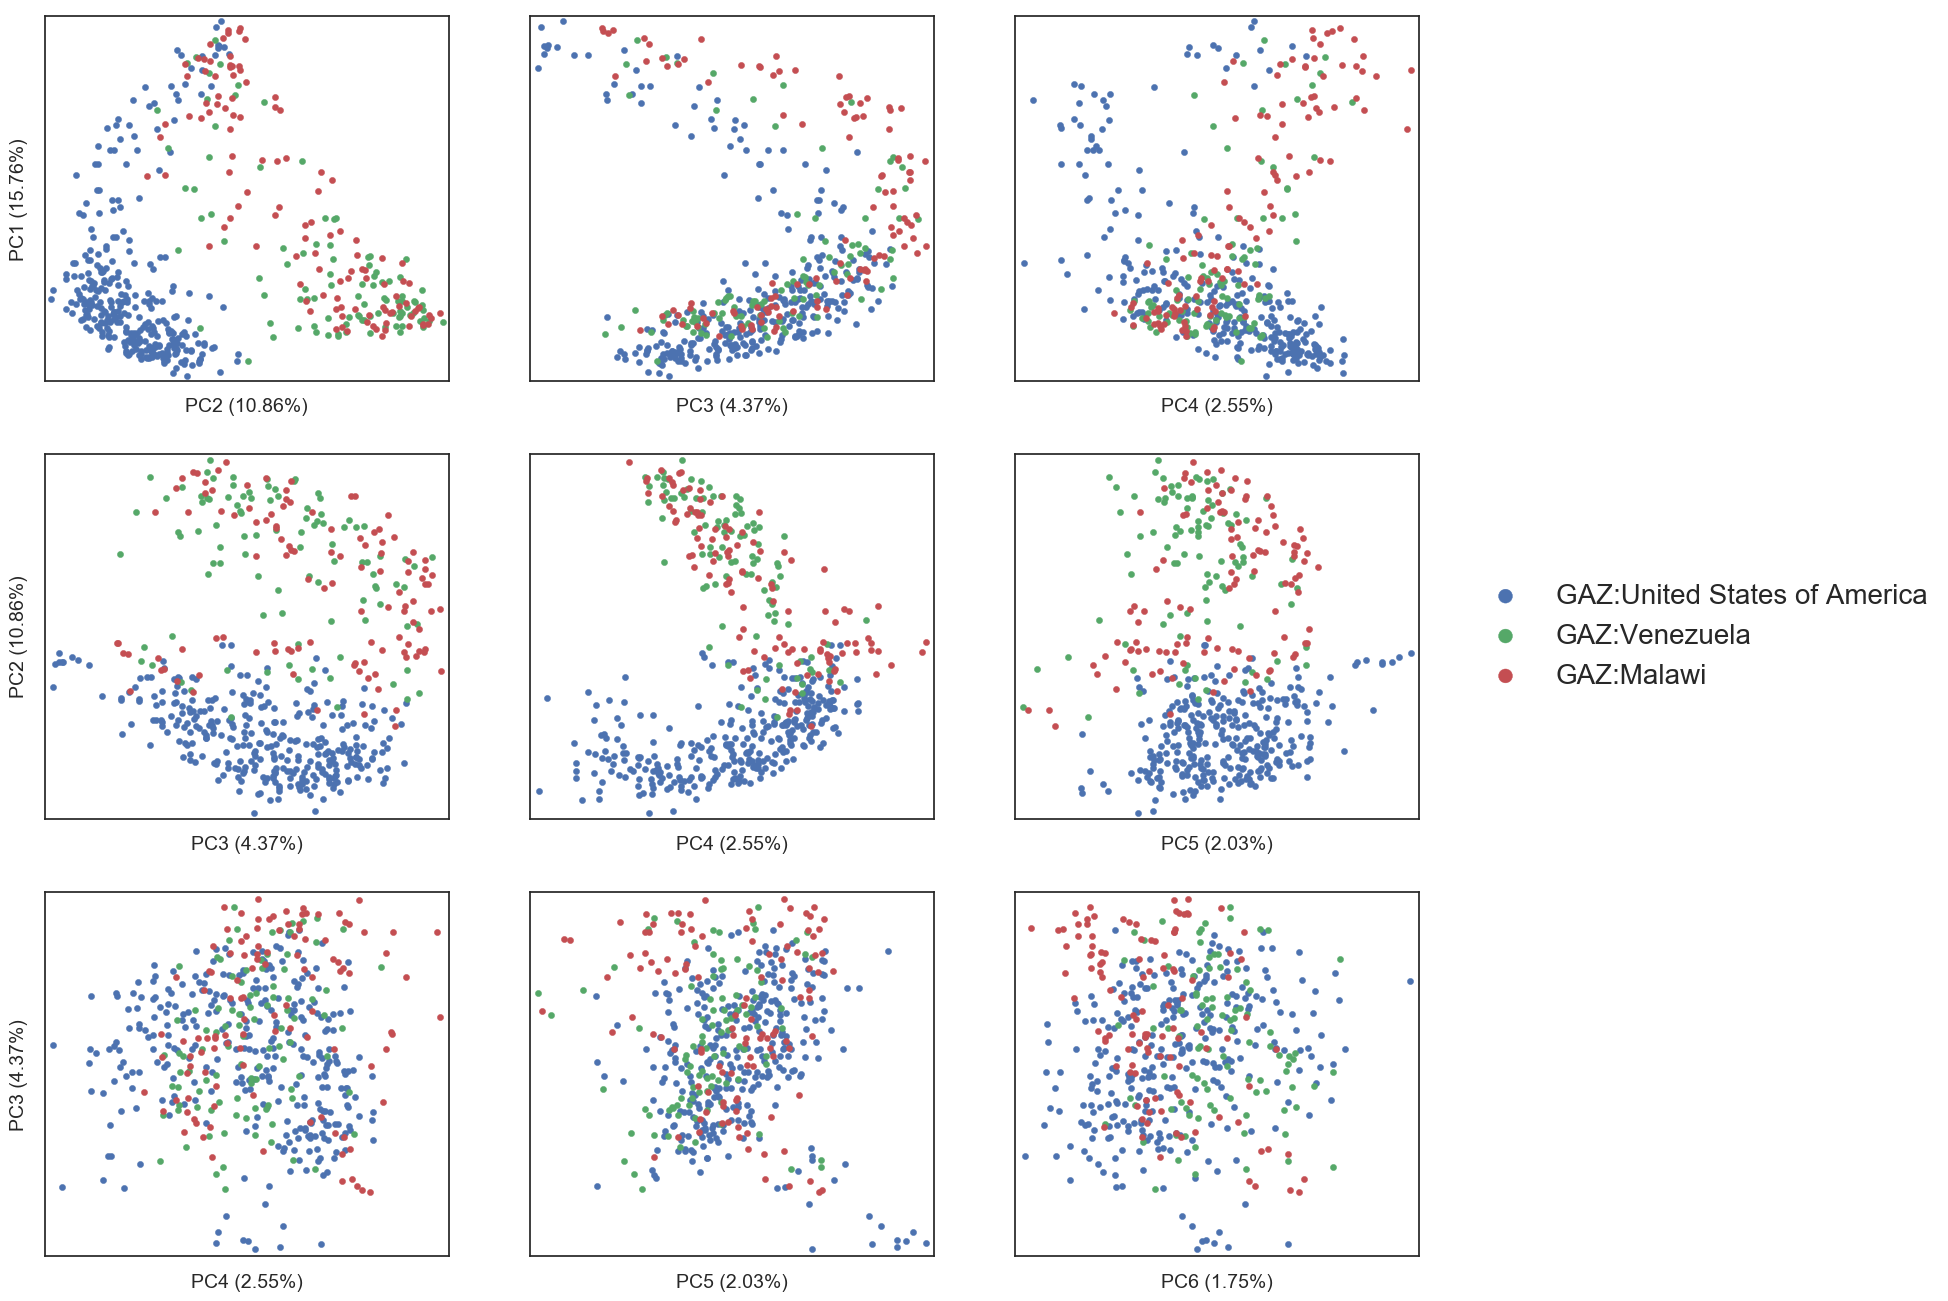

In [4]:
x = plot_3x3(res, 0, mf, 'country', colormap)

This plotting method also supports displaying gradients, and so we can use it to recreate the age trend in figure S2A.

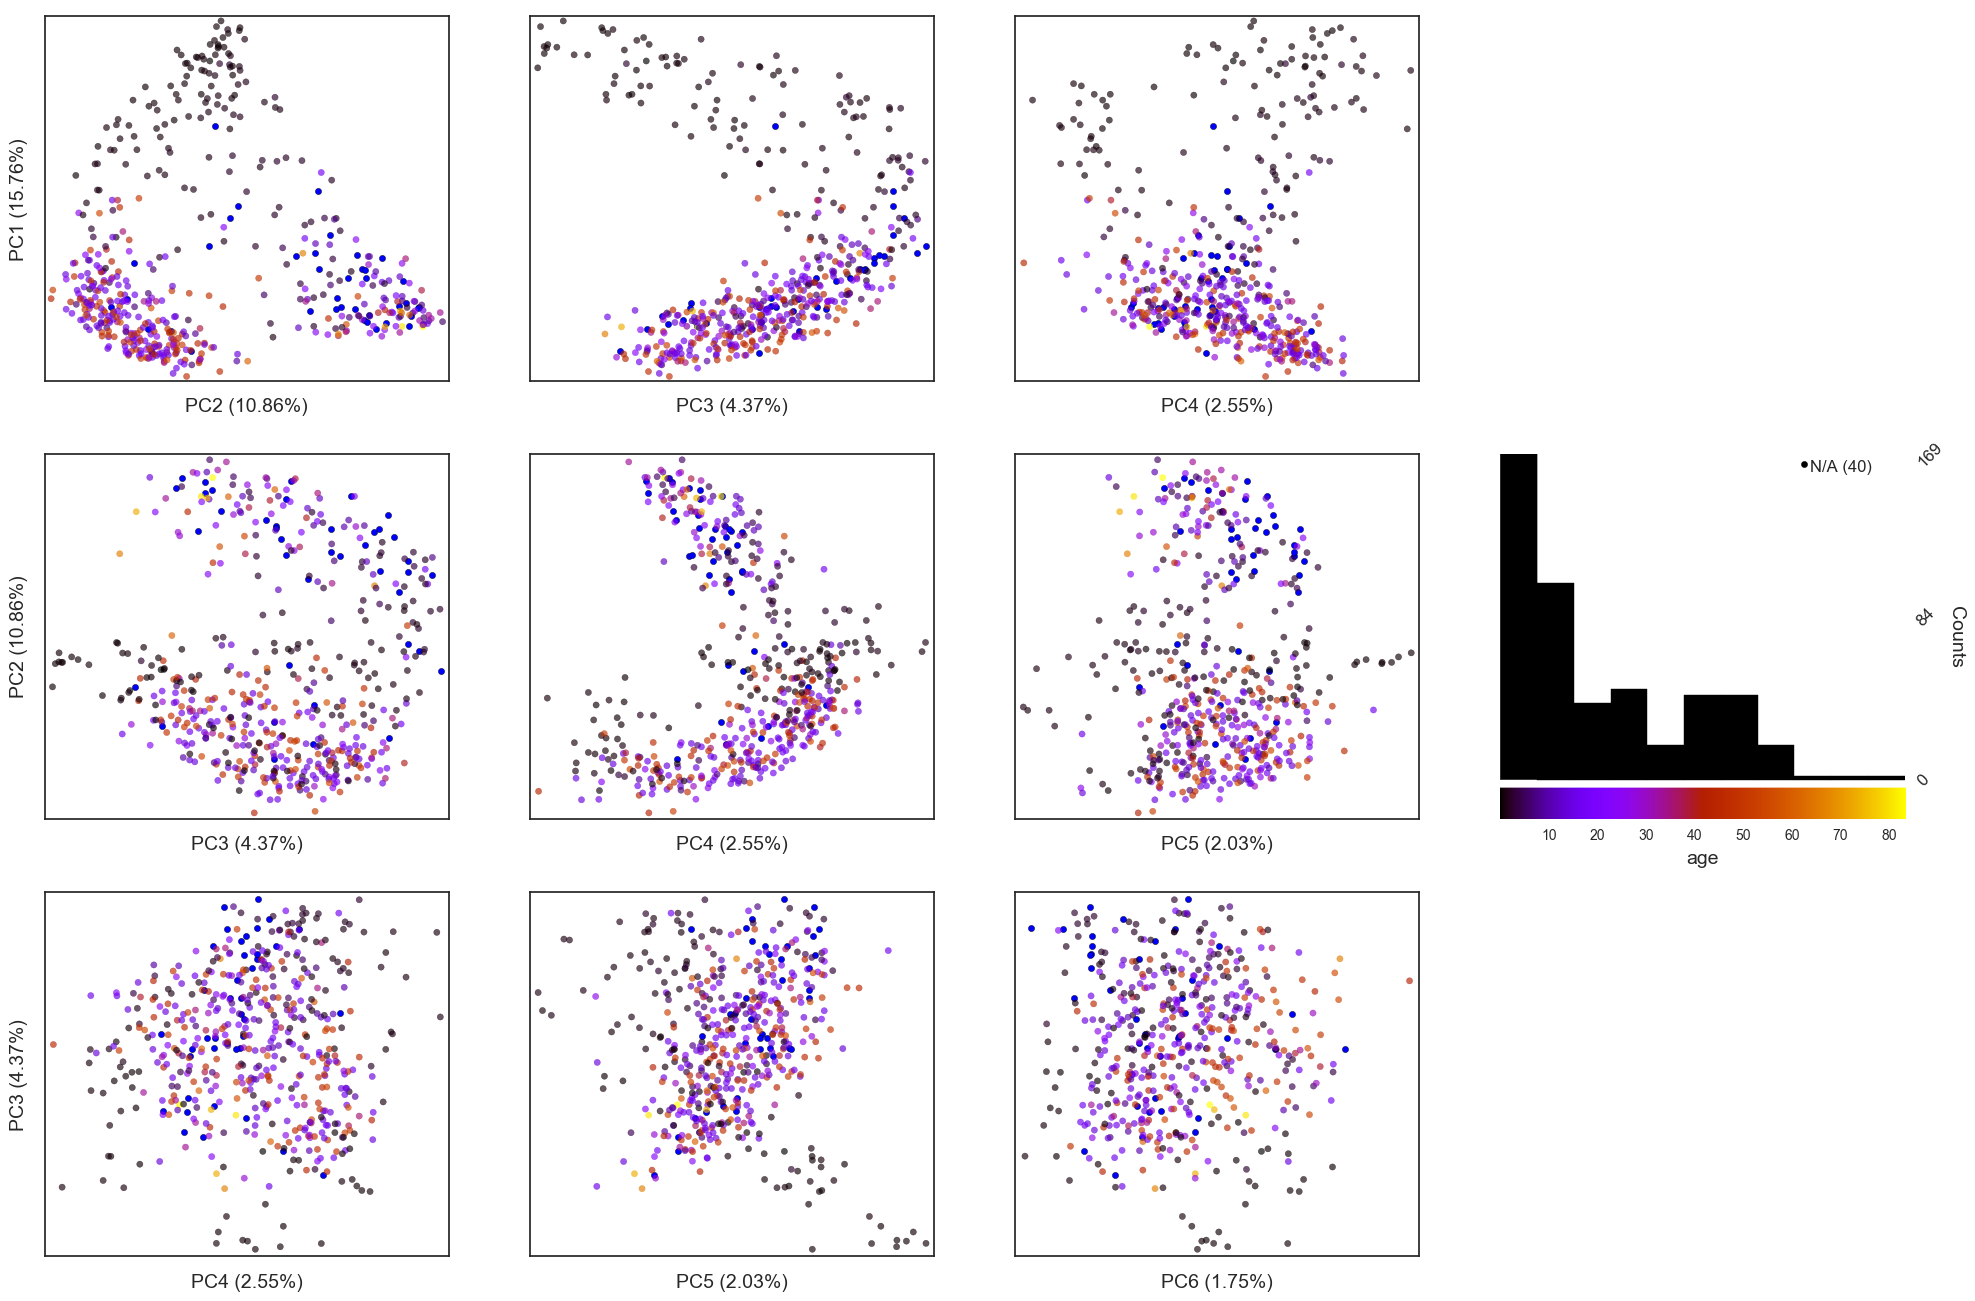

In [5]:
mf.age = mf.age.astype(float)
x = plot_3x3(res, 0, mf, 'age', 'gnuplot', focus_kw={'alpha': 0.65})